In [1]:
import pygeoinf as inf
from pygeoinf.symmetric_space.sphere import Sobolev
import numpy as np
from matplotlib import pyplot as plt
from typing import Dict, Any

In [12]:
# Parameters
LMAX = 30
ORDER = 2
SCALE = 0.1
RADIUS = 2

PRIOR_ORDER = 2.0
PRIOR_SCALE = 2.0

N_DATA = 50
STD = 0.01


# Setup Model Space and Forward Problem
model_space = Sobolev(LMAX, ORDER, SCALE, radius=RADIUS)

# Set the unconstrained prior
unconstrained_model_prior_measure = (
    model_space.point_value_scaled_sobolev_kernel_gaussian_measure(
        PRIOR_ORDER, PRIOR_SCALE
    )
)

# Setup Constraint
constraint_operator = model_space.to_coefficient_operator(0, lmin=0)
constraint_value = np.array([0])
constraint = inf.AffineSubspace.from_linear_equation(
    constraint_operator, constraint_value, solver=inf.CholeskySolver()
)

# Form the constrained prior
model_prior_measure = constraint.condition_gaussian_measure(
    unconstrained_model_prior_measure
)

In [16]:
power_spectra = model_space._sample_power_measure(model_prior_measure, int(1e4), parallel=True, n_jobs=8)

Backend threading restricted to 1 thread(s).
Backend threading restricted to -1 thread(s).


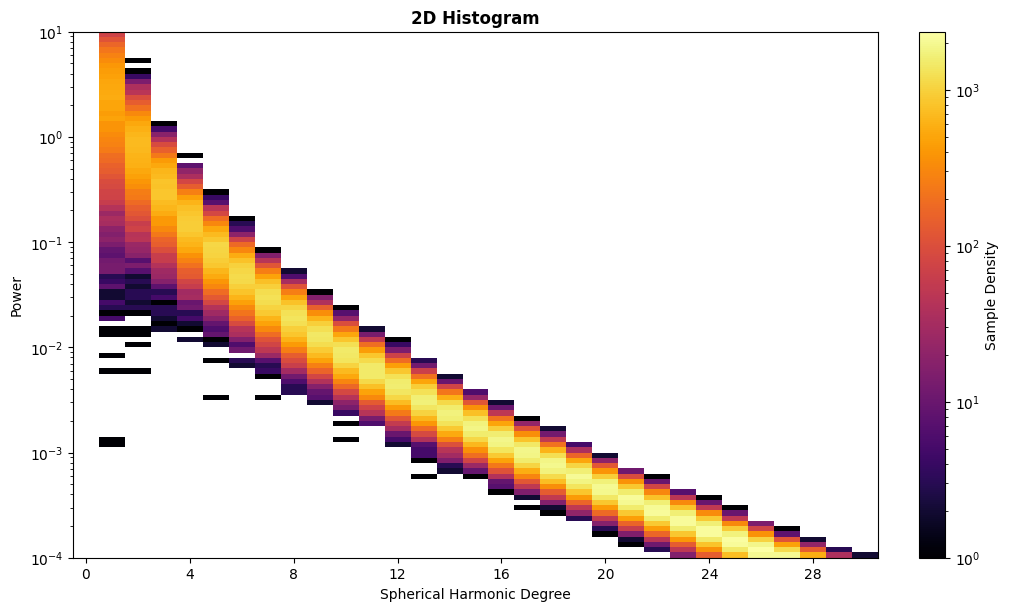

In [17]:
model_space.plot_power_spectrum_2d(power_spectra, y_range=(1e-4, 1e1))
plt.show()

In [6]:
true_power_spectrum = {l: np.loadtxt(f'/space/ij264/earth-tunya/geoinf_analysis/dynamic_topography/synthetic/examples/power/varying_prior/powers/degree_{l}.txt') for l in range(1, 40)}

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': '2D Histogram'}, xlabel='Spherical Harmonic Degree', ylabel='Power'>)

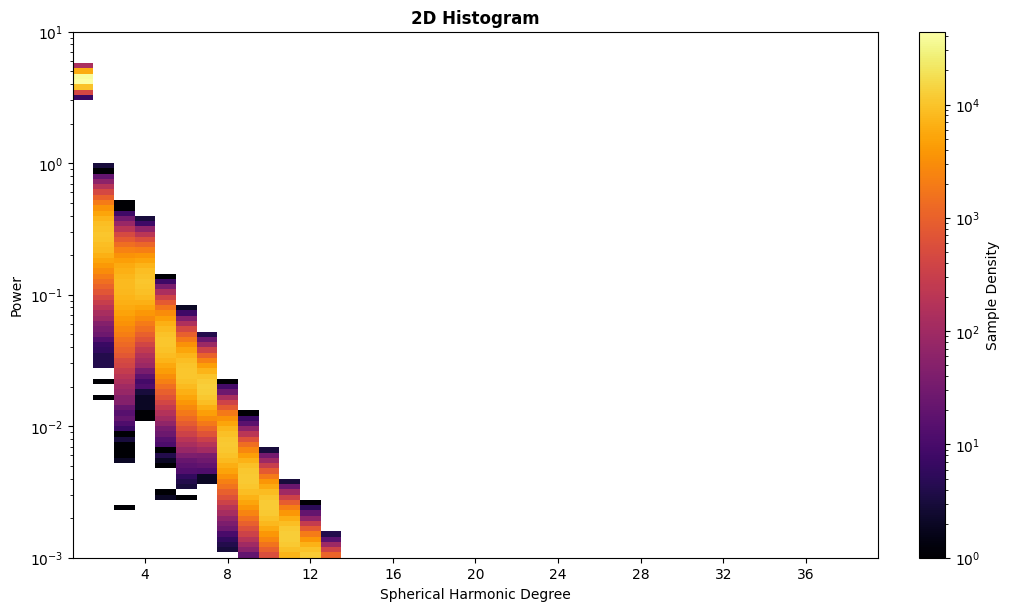

In [7]:
model_space.plot_power_spectrum_2d(true_power_spectrum)